In [5]:
from PIL import Image, ImageDraw
import numpy as np

In [24]:
# load images to PIL
face = Image.open("images/thispersondoesnotexist.jpg")
mask = Image.open("images/mustache.png")
# create draw object for face image
draw = ImageDraw.Draw(face)

In [25]:
mask = np.array(mask)

In [26]:
mask = Image.fromarray(mask[:,:,:])
mask.show()

In [54]:
def find_coeffs(pa, pb):
    
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)


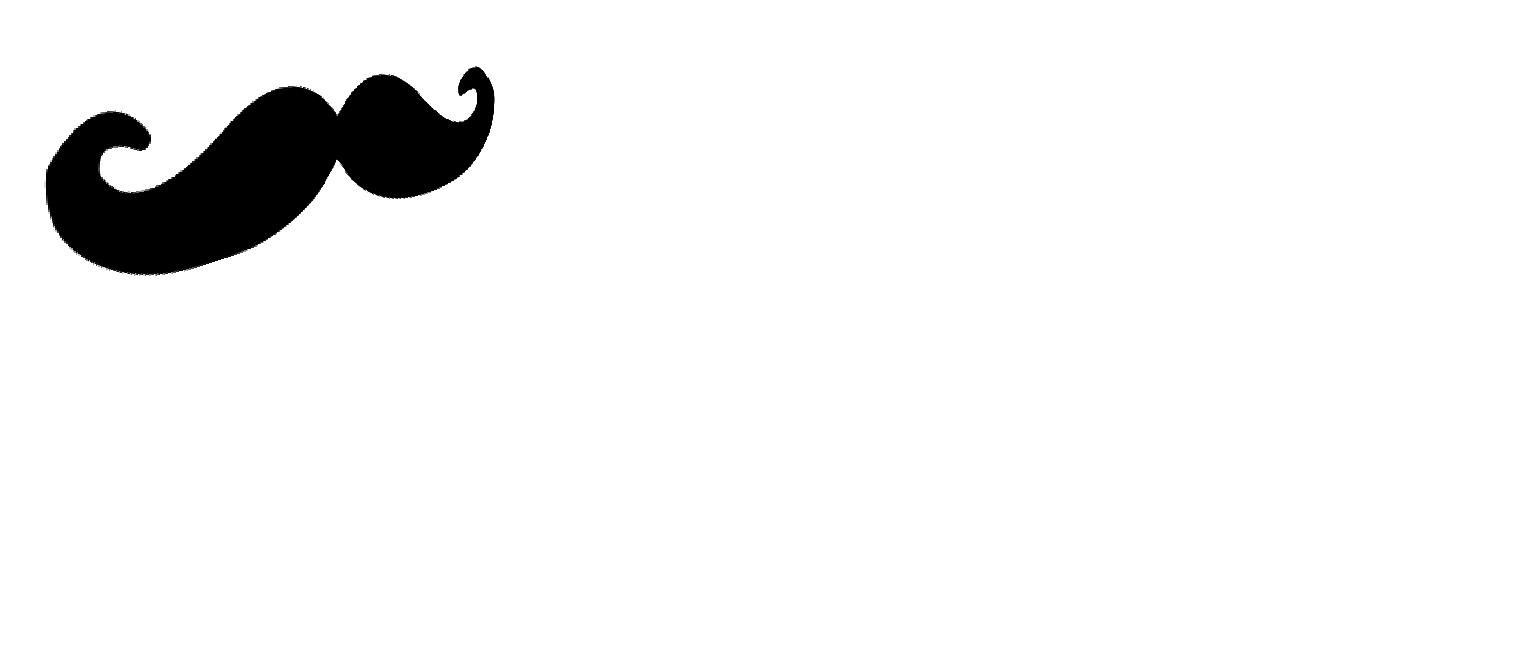

In [56]:
lx, ly = mask.size
src = [(0,0), (0,ly),(lx,ly), (lx, 0)]
dst = [(0,0), (0,ly//2),(lx,ly), (lx, 0)]
mapping = find_coeffs(src, dst)
mask.transform((lx*3,ly*3), Image.PERSPECTIVE, mapping)

In [39]:
mask.show()

In [40]:
mask.size

(512, 221)